In [341]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [444]:
X_train = pd.read_csv('train.csv')
X_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [445]:
Y_train = X_train['Survived']

In [446]:
#feature scaling
X_train['Age'].fillna(0,inplace=True)
# List of columns to normalize
columns_to_normalize = ['Age','Fare' ,'SibSp', 'Parch', 'Pclass']
# Normalize each specified column
for column in columns_to_normalize:
    X_train[column] = (X_train[column] - X_train[column].mean()) / (X_train[column].max() - X_train[column].min())

X_train['Sex'] = X_train['Sex'].apply(lambda x: 1 if x== 'male' else 0)
X_train['Family'] = X_train['SibSp']*X_train['Parch']

In [447]:
#Drop Uneeded COloumns
X_train = X_train.drop(['Name','Ticket','Cabin','Embarked','Survived','PassengerId','SibSp','Parch'],axis=1)

In [448]:
X_train

,Pclass,Sex,Age,Fare,Family
0,0.345679,1,-0.022491,-0.048707,-0.003792
1,-0.654321,0,0.177509,0.076277,-0.003792
2,0.345679,0,0.027509,-0.047390,0.004158
3,-0.654321,0,0.140009,0.040786,-0.003792
4,0.345679,1,0.140009,-0.047146,0.004158
...,...,...,...,...,...
886,-0.154321,1,0.040009,-0.037484,0.004158
887,-0.654321,0,-0.059991,-0.004302,0.004158
888,0.345679,0,-0.297491,-0.017087,0.016083
889,-0.654321,1,0.027509,-0.004302,0.004158


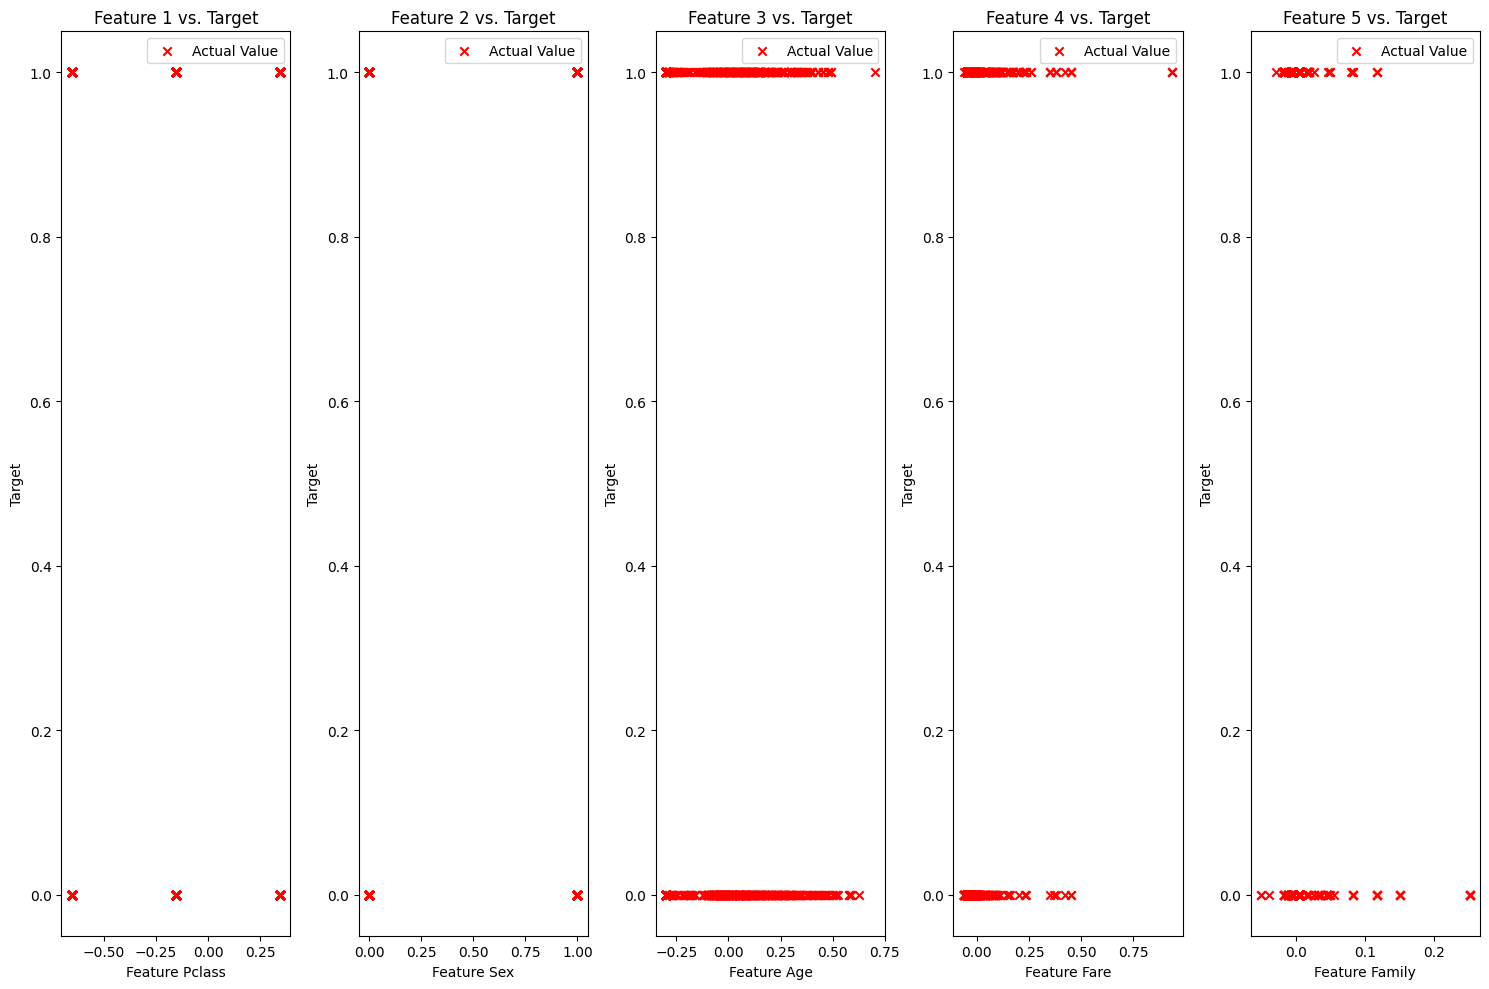

In [450]:
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame with 6 features and Y_train is the target variable
num_features = X_train.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(15, 10))  # Creates a 2x3 grid for 6 features

for i, ax in enumerate(axes.flat):
    ax.scatter(X_train.iloc[:, i], Y_train, marker='x', c='r', label="Actual Value")
    ax.set_title(f"Feature {i+1} vs. Target")
    ax.set_xlabel(f"Feature {X_train.columns[i]}")
    ax.set_ylabel("Target")
    ax.legend()

plt.tight_layout()
plt.show()

In [451]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [434]:
X_train

array([[ 0.34567901,  1.        , -0.02249116,  0.05962402, -0.06359895,
        -0.04870737],
       [-0.65432099,  0.        ,  0.17750884,  0.05962402, -0.06359895,
         0.07627731],
       [ 0.34567901,  0.        ,  0.02750884, -0.06537598, -0.06359895,
        -0.04738986],
       ...,
       [ 0.34567901,  0.        , -0.29749116,  0.05962402,  0.26973438,
        -0.01708708],
       [-0.65432099,  1.        ,  0.02750884, -0.06537598, -0.06359895,
        -0.00430233],
       [ 0.34567901,  1.        ,  0.10250884, -0.06537598, -0.06359895,
        -0.04773144]])

In [435]:
Y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [436]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [437]:
def cost(x,y,w,b):
    m = len(x)
    cost = 0.0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost/m
    return cost

In [438]:
#compute cost
np.set_printoptions(suppress=True)
w = np.zeros(X_train.shape[1])
b = 0
print(cost(X_train,Y_train,w,b))

0.6931471805599373


In [439]:
def grad(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.
    for i in range(m):
        f_wb  = np.dot(x[i],w)+b
        err = sigmoid(f_wb) - y[i]
        for j in range(n):
            dj_dw[j] += err*x[i,j]
        dj_db += err
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m   
    return dj_dw,dj_db

In [440]:
print(grad(X_train,Y_train,w,b))

(array([ 0.06877416,  0.20145903, -0.00112671,  0.00236654, -0.00533014,
       -0.01213049]), np.float64(0.11616161616161616))


In [441]:
def gradient_descent(x,y,w,b,a,iterations):
    J_history = []
    w_actual = w[:]
    b_actual = b
    for i in range(iterations):
        dj_dw,dj_db = grad(x,y,w_actual,b_actual)
        # print(dj_dw)
        w_actual = w_actual - a*dj_dw
        b_actual = b_actual - a*dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost(x, y, w_actual, b_actual) )
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% np.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w_actual,b_actual,J_history

In [454]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = -2
alph = 0.01
iters = 50000
w_out,b_out,hist = gradient_descent(X_train,Y_train,w_tmp,b_tmp,alph,iters)

Iteration    0: Cost 0.8938357590391004   
Iteration 5000: Cost 0.475005865645052   
Iteration 10000: Cost 0.46213821953219225   
Iteration 15000: Cost 0.46007277765729476   
Iteration 20000: Cost 0.4593036355736781   
Iteration 25000: Cost 0.4588808997307116   
Iteration 30000: Cost 0.45860910624694945   
Iteration 35000: Cost 0.458415908765595   
Iteration 40000: Cost 0.4582659002105258   
Iteration 45000: Cost 0.45814019096810377   


In [463]:
X_test = pd.read_csv('test.csv')
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [457]:
np.set_printoptions(suppress=True)
#feature scaling
X_test['Age'].fillna(0,inplace=True)
# List of columns to normalize
columns_to_normalize = ['Age','Fare' ,'SibSp', 'Parch', 'Pclass']
# Normalize each specified column
for column in columns_to_normalize:
    X_test[column] = (X_test[column] - X_test[column].mean()) / (X_test[column].max() - X_test[column].min())

X_test['Sex'] = X_test['Sex'].apply(lambda x: 1 if x== 'male' else 0)
X_test['Family'] = X_test['SibSp']*X_test['Parch']

In [459]:
#Drop Uneeded COloumns
X_test = X_test.drop(['Name','Ticket','Cabin','Embarked','PassengerId','SibSp','Parch'],axis=1)

In [416]:
X_test

,Pclass,SibSp,Parch,Norm_Age,Norm_Fare,Bin_Sex
0,3,0,0,0.137576,-0.054258,1
1,3,1,0,0.302049,-0.055877,0
2,2,0,0,0.499418,-0.050631,1
3,3,0,0,0.038891,-0.052632,1
4,3,1,1,-0.026898,-0.045556,0
...,...,...,...,...,...,...
413,3,0,0,-0.316372,-0.053827,1
414,1,0,0,0.196786,0.143019,0
415,3,0,0,0.190207,-0.055389,1
416,3,0,0,-0.316372,-0.053827,1


In [460]:
F_wb = sigmoid(np.dot(X_test,w_out)+b_out)
Y_test = [0 if i <0.5 else 1 for i in F_wb ]
Y_test = np.array(Y_test)

In [461]:
print(Y_test)


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [464]:
Y_test = pd.DataFrame(Y_test,columns=['Y_test'])
results = pd.concat([X_test['PassengerId'],Y_test],axis=1)
results.to_csv('output.csv',index=False)

In [240]:
#2nd sample
X_train1 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train1 = np.array([0, 0, 0, 1, 1, 1])  
w_array1 = np.array([1,1])


(6, 2)

In [237]:
for i in range(len(X_train1)):
    print(np.dot(X_train1[i],w_array1))

2.0
2.0
2.0
3.5
4.0
3.5


In [230]:
np.dot(,[1.,1.])

np.float64(2.0)

In [232]:
np.array([0.5,0.5]).shape

(2,)